In [2]:
! pip install selenium

In [6]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image

import re

In [11]:
%pwd

'C:\\Users\\301-1\\Desktop\\data\\dummy\\Python'

In [14]:
# 웹드라이브로 크롬브라우즈 띄운다.
driver_path = "../driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

In [15]:
url_page = 'http://www.seleniumhq.org/projects/webdriver/'
driver.get(url_page)

In [22]:
# download를 클릭해줌
driver.find_element_by_css_selector('#menu_download > a').click()

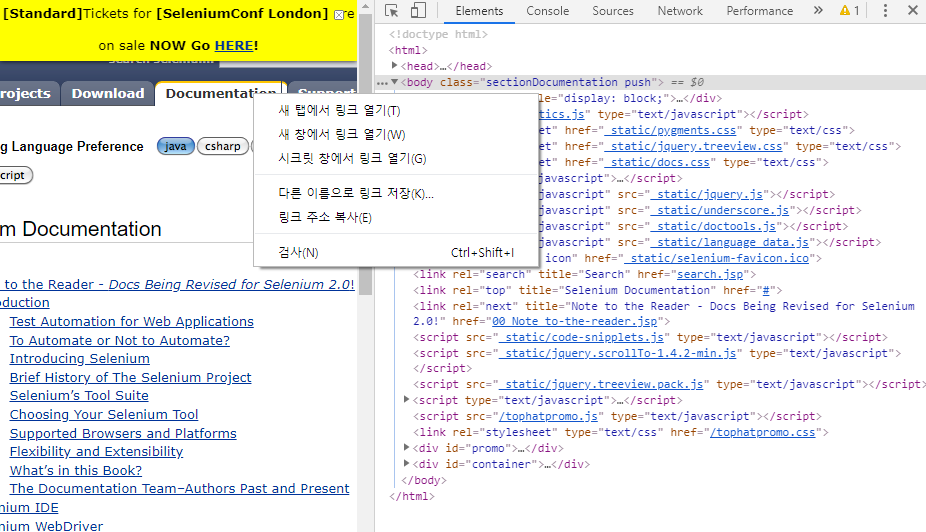

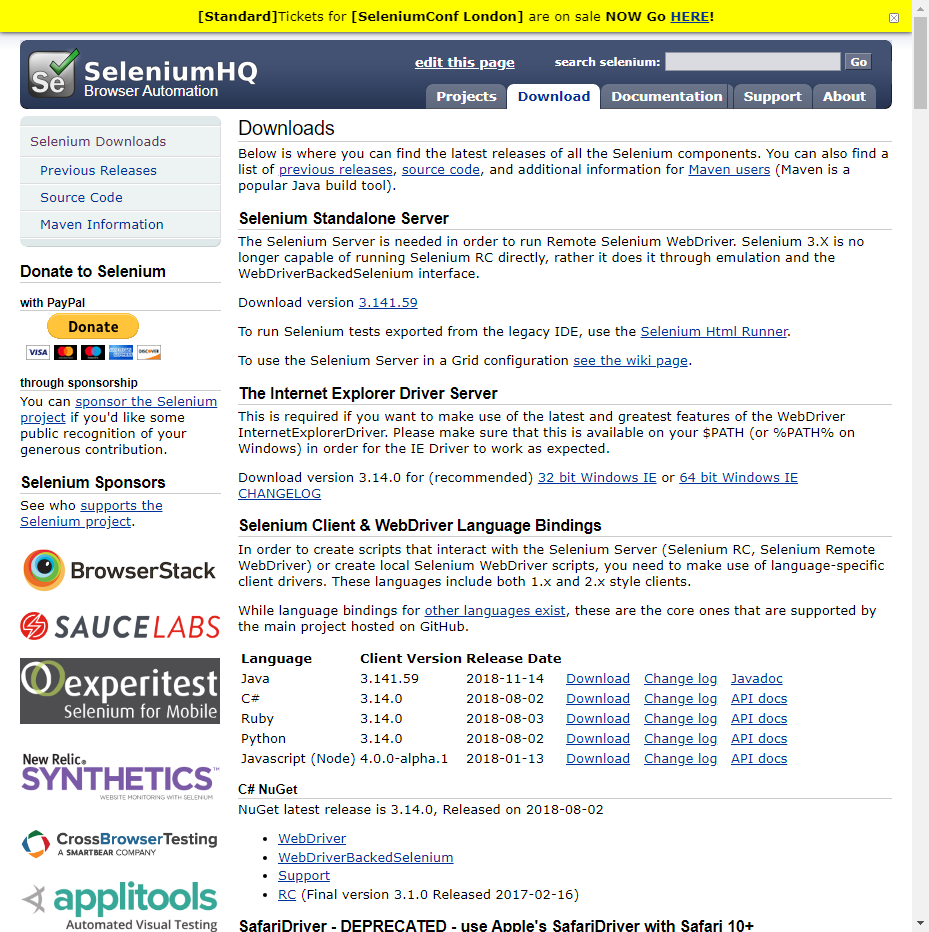

In [25]:
capture_img = '../images/seleniumhq_download.png'
driver.save_screenshot(capture_img)
Image(capture_img)

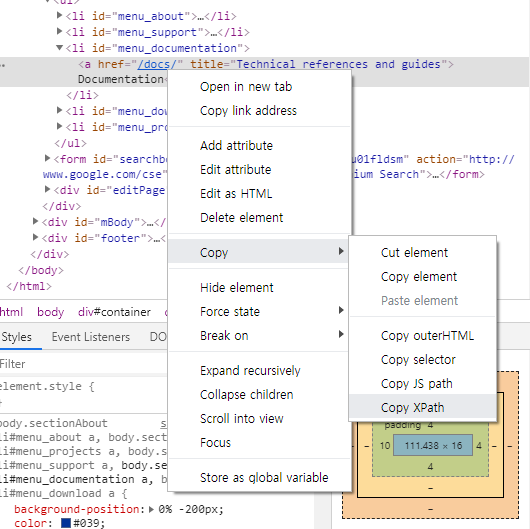

In [26]:
# 위 경로를 여기다가 갖다 붙임.
driver.find_element_by_xpath('//*[@id="menu_documentation"]/a').click()

## 네이버 크롤링

In [27]:
url_page = 'https://www.naver.com'
driver.get(url_page)

In [28]:
# XQury
driver.find_element_by_xpath('//*[@id="PM_ID_serviceNavi"]/li[6]/a').click()
# jQuery
# driver.find_element_by_css_selector('#PM_ID_serviceNavi > li:nth-child(6) > a').click()

In [29]:
# 평점&리뷰 1등 페이지로 이동
driver.find_element_by_css_selector('#review1 > div > a').click()

In [30]:
# 리뷰 클릭
driver.find_element_by_css_selector('#movieEndTabMenu > li:nth-child(6) > a').click()

In [31]:
current_url = driver.current_url
current_url

'https://movie.naver.com/movie/bi/mi/review.nhn?code=167560'

In [32]:
# pattern = re.compile("[\d+,?]+")
pattern = re.compile("\d{6}")
result = pattern.findall(current_url)
code = result[0] if len(result)>0 else ''
code

'167560'

In [33]:
review_url = current_url.replace(code, '{}')
review_url

'https://movie.naver.com/movie/bi/mi/review.nhn?code={}'

In [37]:
movie_title = '봉오동 전투'
# movie_title = '알라딘'
driver.find_element_by_css_selector('#ipt_tx_srch').send_keys(movie_title)

In [38]:
# 검색 클릭
driver.find_element_by_css_selector('#jSearchArea > div > button').click()

In [39]:
# 검색 첫번째 페이지로 이동
driver.find_element_by_css_selector('#old_content > ul:nth-child(4) > li:nth-child(1) > dl > dt > a').click()

In [40]:
# 페이지 BeautifulSoup 객체로 가져온다
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [41]:
soup.title

<title>봉오동 전투 : 네이버 영화</title>

In [42]:
current_url = driver.current_url
current_url

'https://movie.naver.com/movie/bi/mi/basic.nhn?code=178526'

In [43]:
pattern = re.compile("\d{6}")
result = pattern.findall(current_url)
code = result[0] if len(result)>0 else ''
code

'178526'

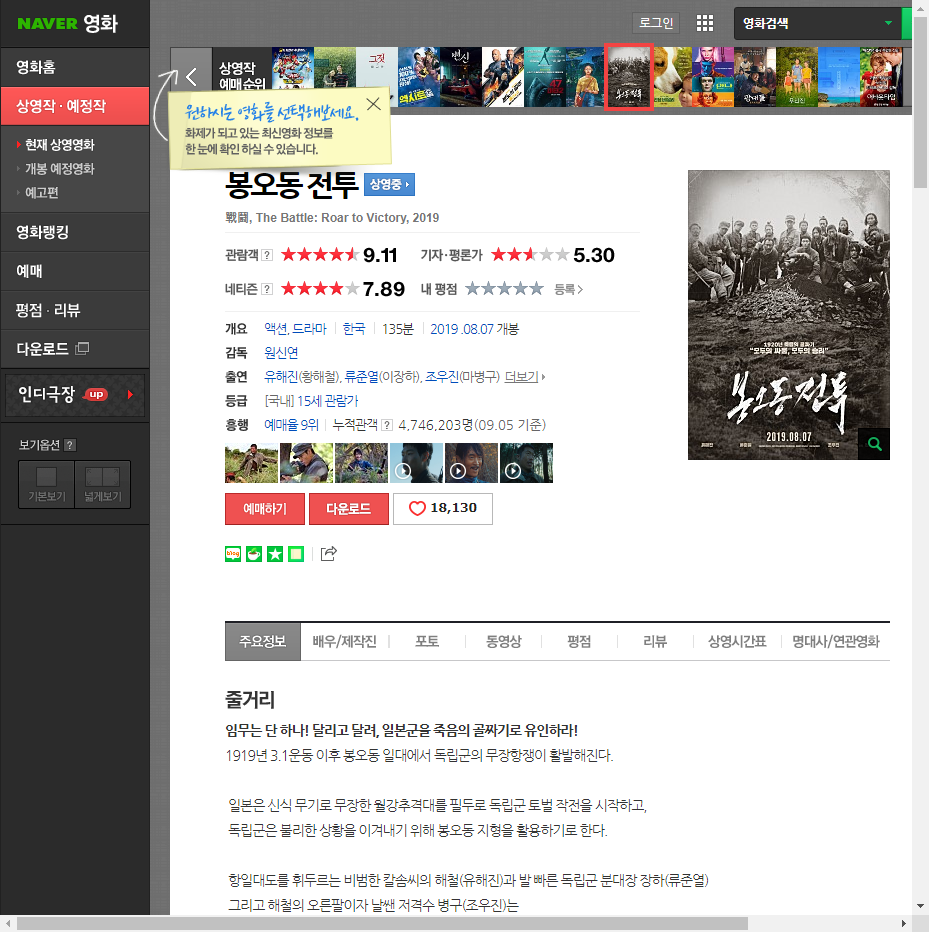

In [45]:
# 영화메인페이지 캡처후 저장
capture_img = '../images/naver_movie_{code}.png'.format(code=code)
driver.save_screenshot(capture_img)
Image(capture_img)

In [46]:
# 리뷰페이지로 바로 이동
url_page = review_url.format(code)
driver.get(url_page)

In [47]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml")
soup.title

<title>봉오동 전투 : 네이버 영화</title>

In [48]:
movie_title = soup.title.get_text().split(':')[0].strip()
movie_title

'봉오동 전투'

In [49]:
review_cnt = soup.find("span","cnt")
review_cnt

<span class="cnt">총<em>440</em>건</span>

In [50]:
review_cnt2 = review_cnt.find("em").get_text()
review_cnt2

'440'

In [51]:
review_cnt_total = int(review_cnt2.replace(',', ''))
review_cnt_total

440

In [52]:
last_page = review_cnt_total//10 + 1
last_page

45

In [53]:
'영화 "{}"의 리뷰수는 총 {}건이며, 마지막 페이지는 {} 입니다.'.format(movie_title, review_cnt_total, last_page)

'영화 "봉오동 전투"의 리뷰수는 총 440건이며, 마지막 페이지는 45 입니다.'

In [ ]:
# 리뷰 마지막 페이지로 이동
url_page = 'https://movie.naver.com/movie/bi/mi/review.nhn?code={}&page={}'.format(code, last_page)
driver.get(url_page)